In [716]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [717]:
#importing libraries

In [718]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.combine import SMOTEENN #resampling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline

load dataset

In [720]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

data exploring

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [723]:
df.shape

(253680, 22)

In [724]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [725]:
# to rename the some columns important of dataset
df.rename(columns={'Diabetes_012': 'Diabetes_Type'}, inplace=True)
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


cleaning dataset

In [727]:
df.isna().sum()

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [728]:
df.BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [729]:
df.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

In [730]:
df.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [731]:
df.PhysHlth.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 12., 25., 27., 21., 22.,  8., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [732]:
df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

In [733]:
df.Education.unique()

array([4., 6., 3., 5., 2., 1.])

In [734]:
df.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [735]:
df.Diabetes_Type.unique()

array([0., 2., 1.])

how many each type 

In [737]:
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

Diabetes_Type
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [738]:
df['Diabetes_Type'].replace({2.0: 1.0},inplace = True)

processing the data

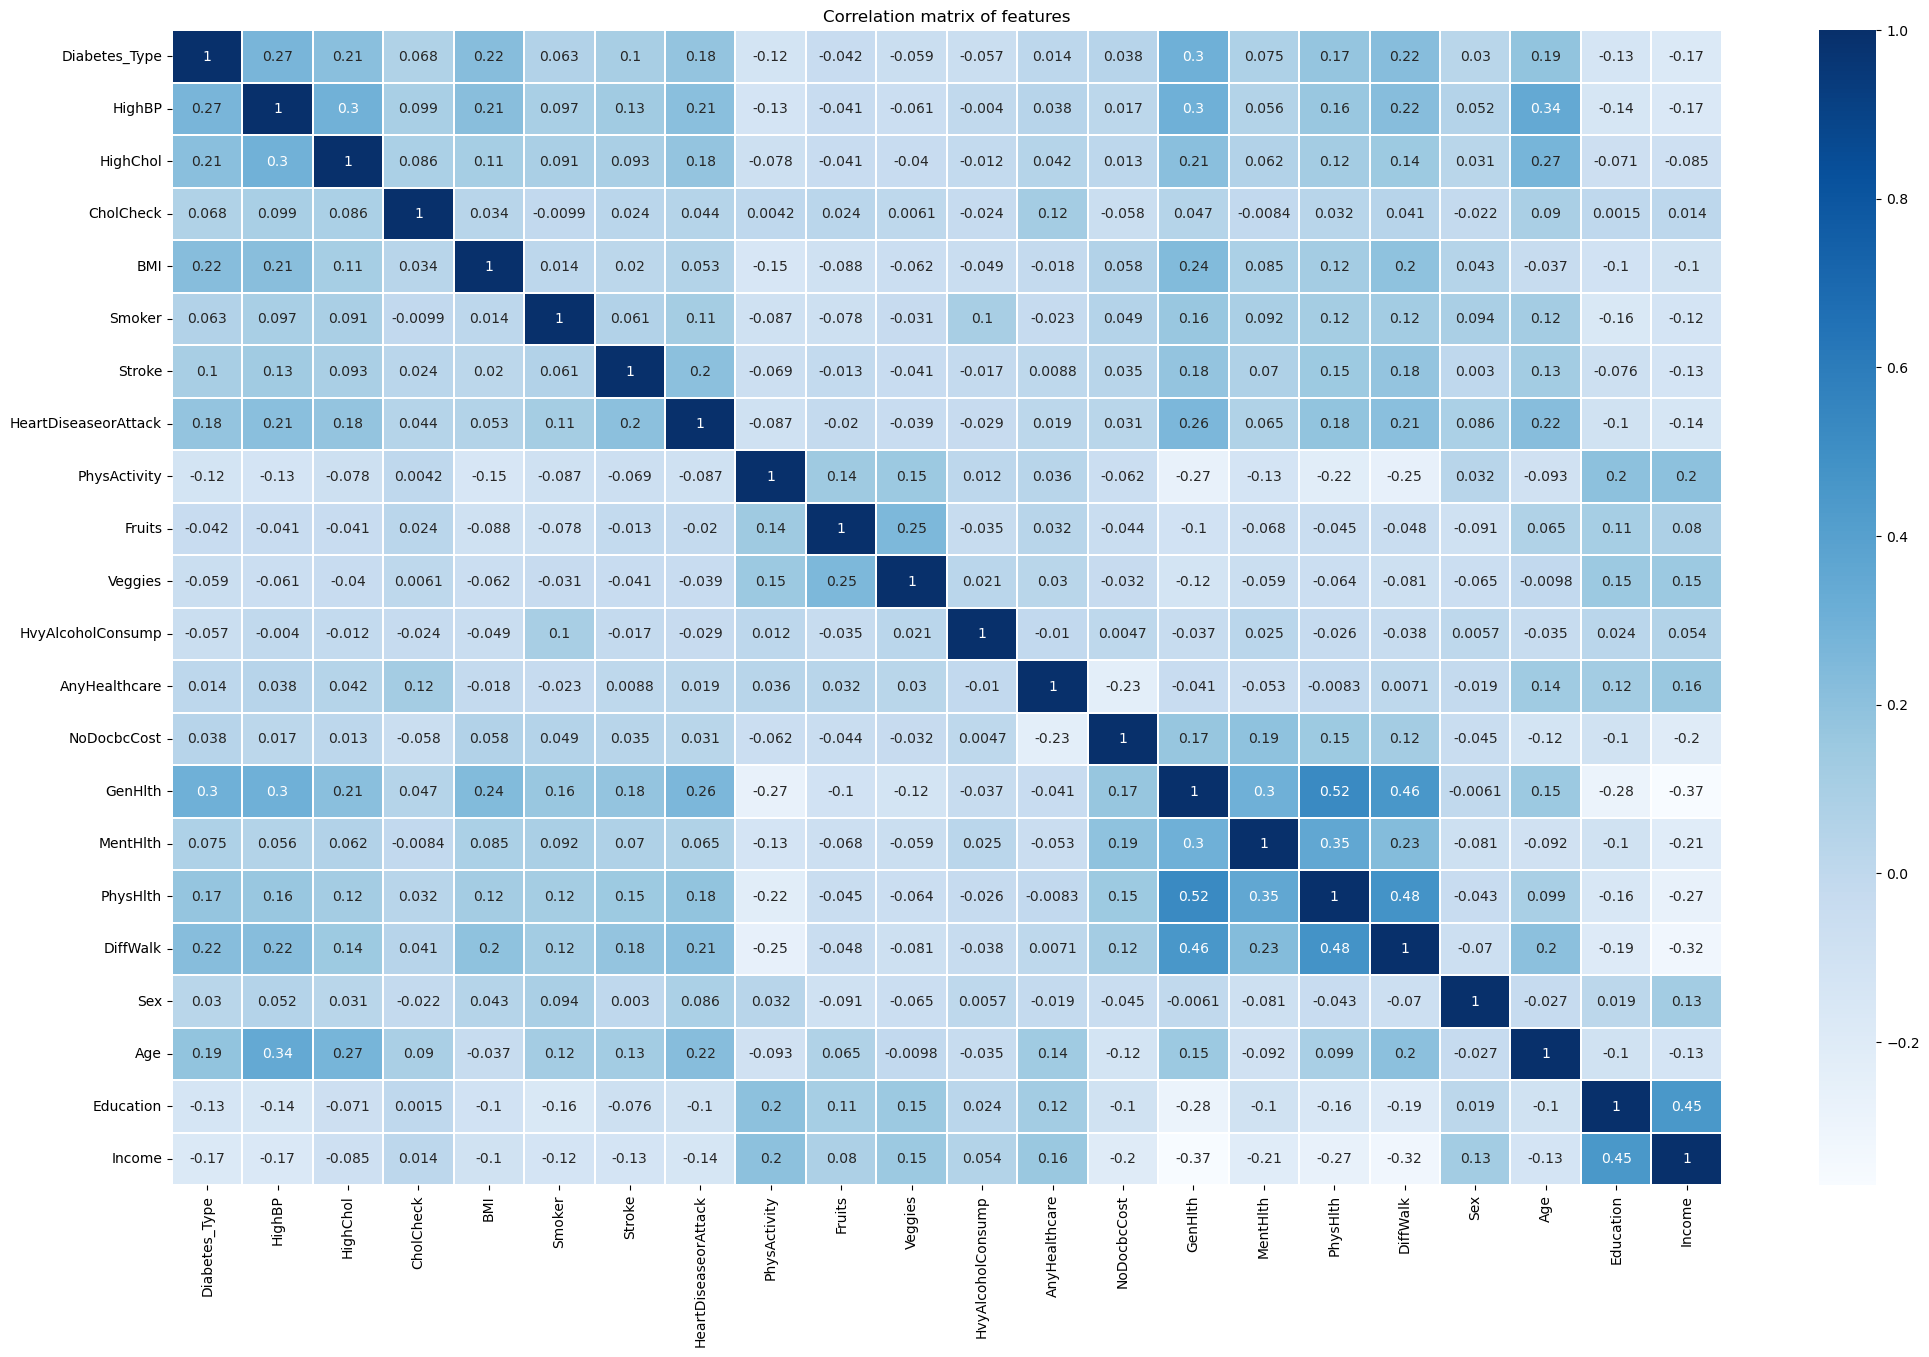

In [740]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [741]:
df['Diabetes_Type'] = df['Diabetes_Type'].astype('int')
df['Diabetes']=df['Diabetes_Type']
df['Diabetes'] = df['Diabetes_Type'].map({0:'No Diabetes', 1:'Diabetes'})
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

Diabetes_Type
0    213703
1     39977
Name: count, dtype: int64

In [742]:
diabetes_bp = df.groupby(['Diabetes_Type', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_Type  HighBP   Count
0              0     0.0  134391
1              0     1.0   79312
2              1     0.0   10460
3              1     1.0   29517


In [743]:
df.columns

Index(['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes'],
      dtype='object')

In [744]:
df['GH']=df['GenHlth']
df['GH'] = df['GH'].map({1:5, 2:4 ,3:3 ,4:2 , 5:1})

In [745]:
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes,GH
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,No Diabetes,1
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,No Diabetes,3
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,No Diabetes,1
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,No Diabetes,4
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,No Diabetes,4


checking if data has null values after processing

In [747]:
df.isna().sum()

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
GH                      0
dtype: int64

build models

training set and test set spilliting

In [750]:
smaller_df=df.loc[:,['Diabetes_Type', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack','PhysActivity', 'GenHlth','MentHlth','DiffWalk', 'Age']]
smaller_df1=df.loc[:,['Diabetes_Type', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack','PhysActivity', 'GH','MentHlth','DiffWalk', 'Age']]

In [751]:
df_train, df_test = train_test_split(smaller_df, test_size=0.20, random_state=0)
df_train, df_val = train_test_split(df_train, test_size=0.20, random_state=0)

x,y = df_train.drop(['Diabetes_Type'],axis=1),df_train['Diabetes_Type']

BASE MODEL

In [753]:
x_train1,y_train = df_train.drop(['Diabetes_Type'],axis=1),df_train['Diabetes_Type']
x_val1,y_val = df_val.drop(['Diabetes_Type'],axis=1),df_val['Diabetes_Type']
x_test1,y_test= df_test.drop(['Diabetes_Type'],axis=1),df_test['Diabetes_Type']

In [754]:
print(x_train1.shape)
print(x_val1.shape)
print(x_test1.shape)

(162355, 9)
(40589, 9)
(50736, 9)


MAKING SMALL DATAFRAME FOR FAIR DISTRIBUTION

In [756]:
scaler = MinMaxScaler()
scaler.fit(x_train1)

x_train = scaler.transform(x_train1)
x_test= scaler.transform(x_test1)
x_val=scaler.transform(x_val1)

In [757]:
models_evalutions = {'Model':[],
                     'Accuracy':[],
                     'Precision':[],
                     'Recall':[], 
                     'F1 score':[]}

In [758]:
#model_names = ["knn_final", "lr_final","Dt_final","rf_final"]
#model_vars = [eval(n) for n in model_names]
#model_list = list(zip(model_names, model_vars))

In [759]:
x0_train=x_train.copy()
x0_val=x_val.copy()

K Nearest Neighbour classification

In [761]:
# Using KNN (smaller df1) train on training set, and Test on testing set 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x0_train, y_train)
print("The score for kNN without cross val and without using smote is")
print("Training set: {:6.2f}%".format(100*knn.score(x0_train, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(x0_val, y_val)))
print("Test set: {:6.2f}%".format(100*knn.score(x_test, y_test)))

The score for kNN without cross val and without using smote is
Training set:  86.50%
Validation set:  82.75%
Test set:  82.90%


In [762]:
#test the baseline model for smaller df
#prediction
val_pred=knn.predict(x0_val)
#Accuracy
confusion_hard = confusion_matrix( y_val, val_pred)
accuracy = accuracy_score(y_val , val_pred)
precision = precision_score(y_val , val_pred)
recall = recall_score(y_val , val_pred)
f1 = f1_score(y_val,val_pred) 
print('\nKNN Accuracy for validation set=: {0:.4f}, \nprecision: {1:.4f}, \nrecall: {2:.4f},\
\nF1: {3:.4f}'.format(accuracy, precision, recall, f1))


KNN Accuracy for validation set=: 0.8275, 
precision: 0.4124, 
recall: 0.2382,
F1: 0.3020


In [763]:
models_evalutions['Model'].append("KNearest neighbour")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

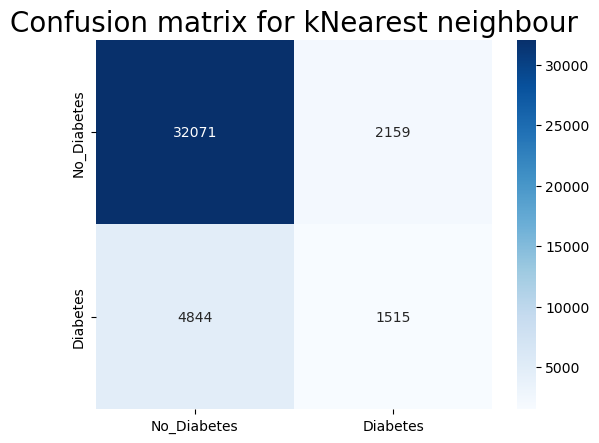

In [863]:
cm = confusion_matrix(y_val, val_pred)
class_label = ["No_Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d",  cmap = "Blues" )
plt.title('Confusion matrix for kNearest neighbour', fontsize = 20); # title with fontsize 20

LOGISTIC REGRESSION

In [766]:
x2_train=x_train.copy()
x2_val=x_val.copy()

In [767]:
#Before balance classes
lr=LogisticRegression()
prams ={"penalty": [ 'l1', 'l2'],
       "C": [0.5 , 0.7,0.8 , 1 , 2.0 , 3.0]}

lr_cv= GridSearchCV(lr , param_grid=prams, n_jobs=-1 ,cv=10)
lr_cv.fit(x2_train , y_train )

print("Best params: ", lr_cv.best_params_)
print("Best estimator: " ,lr_cv.best_estimator_)
print("Best score: ", lr_cv.best_score_)

print("Training Score before balance the labels:",lr_cv.score(x2_train, y_train))
print("Validation Score before balance the labels:",lr_cv.score(x2_val, y_val))

y_pred = lr_cv.predict(x2_val)
print("\nLogistic Regression Accuracy=",accuracy_score(y_val, y_pred))
print("Logistic Regression F1 score=",f1_score(y_val, y_pred))

Best params:  {'C': 2.0, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=2.0)
Best score:  0.8473776555583402
Training Score before balance the labels: 0.847402297434634
Validation Score before balance the labels: 0.846781147601567

Logistic Regression Accuracy= 0.846781147601567
Logistic Regression F1 score= 0.25243418680129825


In [768]:
lr_cv.best_score_

0.8473776555583402

In [769]:
lr_final = lr_cv.best_estimator_
lr_final

LogisticRegression(C=2.0)

In [770]:
lr_final.score(x2_train , y_train)

0.847402297434634

In [771]:
lr_final.score(x_val , y_val)

0.846781147601567

In [772]:
#experiment2-1 with random over sampling
lg1 = LogisticRegression(C=1,penalty="l2")

# randomly oversample positive samples
ROS = RandomOverSampler(random_state=42)

X_tr_rs, y_tr_rs = ROS.fit_resample(x2_train, y_train)

lg1.fit(X_tr_rs, y_tr_rs)
print("Training Score after balance the labels (RandomOverSampler):",lg1.score(X_tr_rs, y_tr_rs))
print("Validation Score after balance the labels (RandomOverSampler)",lg1.score(x_val, y_val))
#model_eval(model3,X_test_std,y_test)


Training Score after balance the labels (RandomOverSampler): 0.7392368621032326
Validation Score after balance the labels (RandomOverSampler) 0.7257138633619946


In [773]:
#experiment2-2 whith random under sampling
lg2 = LogisticRegression(C=1,penalty="l2")

RUS = RandomUnderSampler(random_state=42)

X_tr_us, y_tr_us = RUS.fit_resample(x2_train, y_train)

lg2.fit(X_tr_us, y_tr_us)
print("Training Score after balance the labels (RandomUnderSampler)",lg2.score(X_tr_us, y_tr_us))
print("Validation Score after balance the labels (RandomUnderSampler):",lg2.score(x2_val, y_val))
#model_eval(lg2,X_test_std,y_test)

Training Score after balance the labels (RandomUnderSampler) 0.7389505470802776
Validation Score after balance the labels (RandomUnderSampler): 0.7259355983148144


In [774]:
#experiment2-3 whith balanced weighted classes sampling
lg3 = LogisticRegression(C=1,penalty="l2",class_weight='balanced')

lg3.fit(x2_train, y_train)
#y_pred=lg3.predict(x2_val)
print("Training Score after Balanced class weights Logistic Regression",lg3.score(x2_train, y_train))
print("Validation Score after Balanced class weights Logistic Regression:",lg3.score(x2_val, y_val))

Training Score after Balanced class weights Logistic Regression 0.7280096085738044
Validation Score after Balanced class weights Logistic Regression: 0.7256153144940748


In [775]:
#experiment2-4 whith Smote
lg = LogisticRegression(C=1,penalty="l2")

SMT = SMOTE(random_state=42)

X_tr_smt, y_tr_smt = SMT.fit_resample(x2_train, y_train)

lg.fit(X_tr_smt, y_tr_smt)
y_pred=lg.predict(x2_val)

print("Training Score after balance the labels (Smote):",lg.score(X_tr_smt, y_tr_smt))
print("Validation Score after balance the labels (Smote):",lg.score(x2_val, y_val))
#model_eval(model3,X_test_std,y_test)

Training Score after balance the labels (Smote): 0.7410453323201028
Validation Score after balance the labels (Smote): 0.7249008352016556


In [776]:
# classification report for logisitic
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.939     0.720     0.815     34230
           1      0.332     0.749     0.460      6359

    accuracy                          0.725     40589
   macro avg      0.636     0.735     0.638     40589
weighted avg      0.844     0.725     0.760     40589

ACCURACY: 0.7249008352016556
RECALL: 0.7490171410599151


In [777]:
models_evalutions['Model'].append("LogisticRegression with Smote")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

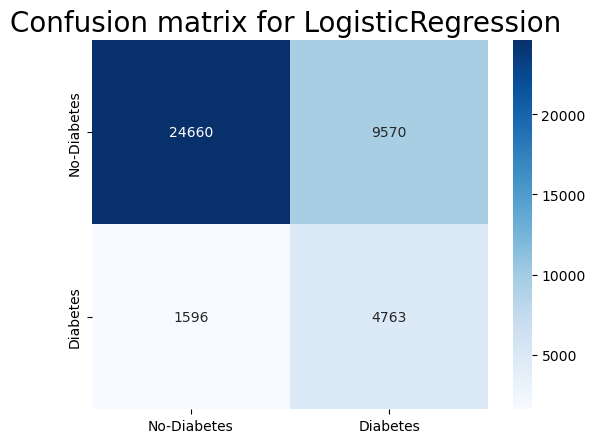

In [778]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for LogisticRegression ', fontsize = 20); # title with fontsize 20

DECISION TREE

In [779]:
x3_train=x_train.copy()
x3_val=x_val.copy()

In [780]:
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [4, 6, 10, 12]}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring = 'f1')
grid_search.fit(x3_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)


In [781]:
Dt_final = grid_search.best_estimator_
Dt_final

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [782]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=10,
                                     max_features='sqrt',
                                     random_state=42)

tree.fit(x3_train,y_train)

print("Training Score In Decision Tree Classification:",tree.score(x3_train, y_train))
print("Validation Score In Decision Tree: Classification",tree.score(x2_val, y_val))
y_pred = tree.predict(x3_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

Training Score In Decision Tree Classification: 0.8528594746081118
Validation Score In Decision Tree: Classification 0.8477912734977457
DT Accuracy= 0.8477912734977457
DT F1 score= 0.24529684827754702


In [783]:
# classification report for Decision Tree 
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.862     0.976     0.915     34230
           1      0.550     0.158     0.245      6359

    accuracy                          0.848     40589
   macro avg      0.706     0.567     0.580     40589
weighted avg      0.813     0.848     0.810     40589

ACCURACY: 0.8477912734977457
RECALL: 0.15788646013524138


In [784]:
models_evalutions['Model'].append("Decision Tree Classification")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

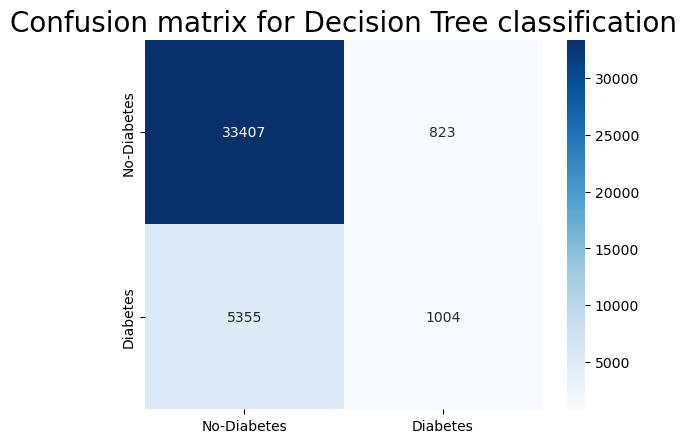

In [785]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree classification', fontsize = 20); # title with fontsize 20

NAIVE BAYES

In [786]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [787]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Bayes val score: ",nb.score(x_val,y_val))
print("Naive Bayes Train score: ",nb.score(x_train,y_train))
y_pred_nb = nb.predict(x_val)

Naive Bayes val score:  0.7901894601985759
Naive Bayes Train score:  0.7905638877767854


In [788]:
y_pred=nb.predict(x_val)

In [789]:
# classification report for Naive Bayes
print(classification_report(y_val, y_pred, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred, average="binary")
print("ACCURACY:",accuracy_score(y_val, y_pred))
print("RECALL:",recall_score(y_val, y_pred, average="binary"))

              precision    recall  f1-score   support

           0      0.897     0.848     0.872     34230
           1      0.369     0.478     0.416      6359

    accuracy                          0.790     40589
   macro avg      0.633     0.663     0.644     40589
weighted avg      0.815     0.790     0.801     40589

ACCURACY: 0.7901894601985759
RECALL: 0.47790533102689103


In [790]:
models_evalutions['Model'].append("Naive-B")
models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
models_evalutions['Precision'].append(precision_score(y_val, y_pred))
models_evalutions['Recall'].append(recall_score(y_val, y_pred))
models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

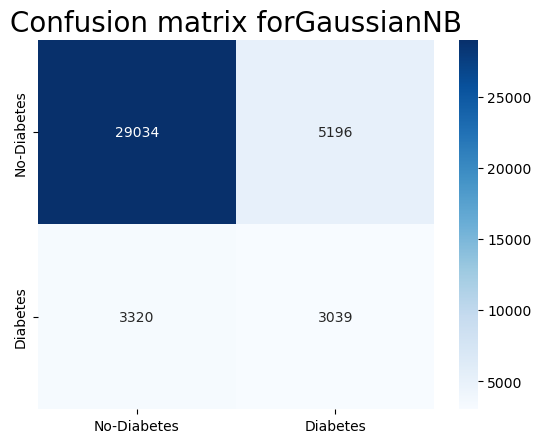

In [791]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix forGaussianNB', fontsize = 20); # title with fontsize 20

In [792]:
result= pd.DataFrame.from_dict(models_evalutions)
result

,Model,Accuracy,Precision,Recall,F1 score
0,KNearest neighbour,0.790189,0.369035,0.477905,0.416473
1,LogisticRegression with Smote,0.724901,0.332310,0.749017,0.460371
2,Decision Tree Classification,0.847791,0.549535,0.157886,0.245297
3,Naive-B,0.790189,0.369035,0.477905,0.416473


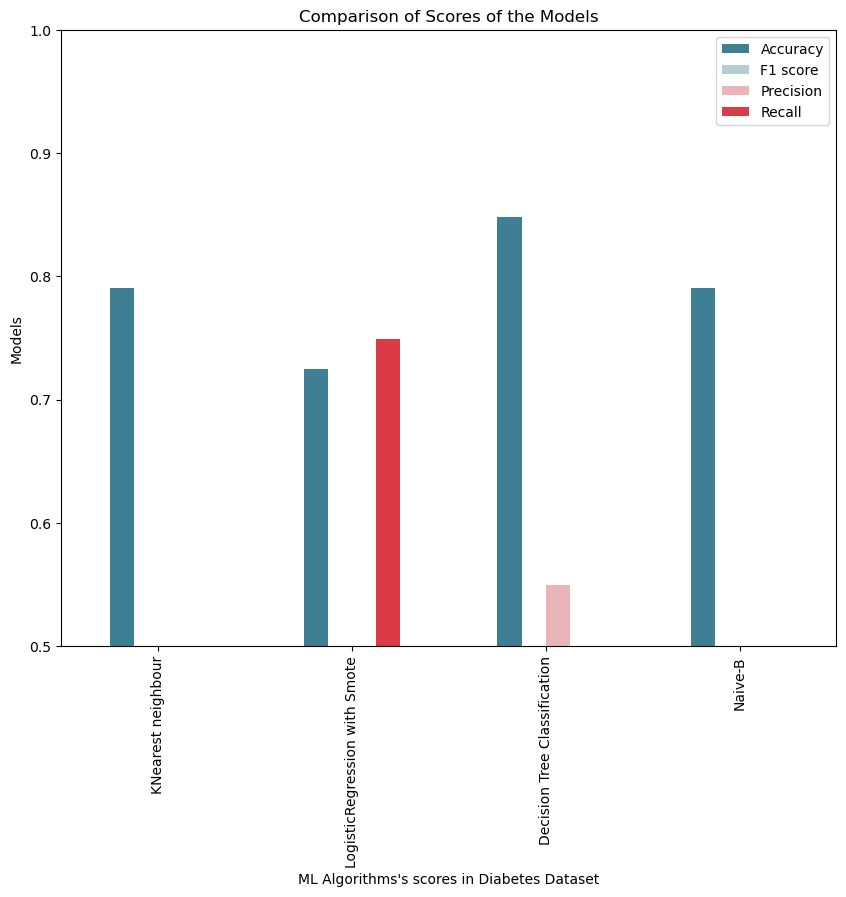

In [875]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
result.plot.bar(x='Model',y=['Accuracy','F1 score','Precision','Recall'], cmap=cmap, figsize=(10,8))
plt.title("Comparison of Scores of the Models")
plt.ylabel("Models")
plt.ylim(0.50, 1.0)
plt.xlabel("ML Algorithms's scores in Diabetes Dataset")
plt.show()